In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import sklearn

In [4]:
df1=pd.read_csv("testset.csv")

In [5]:
df=df1.copy()

In [6]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [8]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [9]:
df[" _wdire"].value_counts

<bound method IndexOpsMixin.value_counts of 0          West
1         North
2         North
3         North
4         North
          ...  
100985       NW
100986       NW
100987     West
100988       NW
100989       NW
Name:  _wdire, Length: 100990, dtype: object>

In [10]:
df.rename(columns={" _conds":"conditions"," _dewptm":"dew_temp"," _fog":"fog"," _hail":"balls_of_ice "," _tempm":"temp_metrics"," _hum":"humidity"," _pressurem":"atm_pressure ",
" _rain":"rain"," _snow":"snow"," _tempm":"temp"," _thunder":" tornado"," _wdire":"wind_direction"},inplace =True)

In [11]:
df.columns

Index(['datetime_utc', 'conditions', 'dew_temp', 'fog', 'balls_of_ice ',
       ' _heatindexm', 'humidity', ' _precipm', 'atm_pressure ', 'rain',
       'snow', 'temp', ' tornado', ' _tornado', ' _vism', ' _wdird',
       'wind_direction', ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [12]:
# deleted columns d_list =[" _heatindexm"," _precipm"," _tornado"," _vism"," _wdird"," _wgustm"," _windchillm"," _wspdm"]
d_list =[" _heatindexm"," _precipm"," _tornado"," _vism"," _wdird"," _wgustm"," _windchillm"," _wspdm"]


df.drop(columns=[" _heatindexm"," _precipm"," _tornado"," _vism"," _wdird"," _wgustm"," _windchillm"," _wspdm"],inplace=True)

In [13]:
df.drop(columns="datetime_utc",inplace =True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   conditions      100918 non-null  object 
 1   dew_temp        100369 non-null  float64
 2   fog             100990 non-null  int64  
 3   balls_of_ice    100990 non-null  int64  
 4   humidity        100233 non-null  float64
 5   atm_pressure    100758 non-null  float64
 6   rain            100990 non-null  int64  
 7   snow            100990 non-null  int64  
 8   temp            100317 non-null  float64
 9    tornado        100990 non-null  int64  
 10  wind_direction  86235 non-null   object 
dtypes: float64(4), int64(5), object(2)
memory usage: 8.5+ MB


In [15]:
df["atm_pressure "].value_counts()

atm_pressure 
1014.0      5371
1016.0      5206
1015.0      5137
1002.0      4614
1000.0      4502
            ... 
1027.0         1
101014.0       1
9963.0         1
10065.0        1
10018.0        1
Name: count, Length: 139, dtype: int64

In [16]:
ab=['dew_temp', 'humidity', 'atm_pressure ', 'temp']
for i in ab:
    a=df[i].isnull().sum()
    print(a)

621
757
232
673


In [17]:
# Fill NaN values with 0, then convert all float columns to integers
#df[['dew_temp', 'humidity', 'atm_pressure ', 'temp']] = df[['dew_temp', 'humidity', 'atm_pressure ', 'temp']].astype(int)


In [18]:
out_1=df.select_dtypes(include="number").columns
out_1

Index(['dew_temp', 'fog', 'balls_of_ice ', 'humidity', 'atm_pressure ', 'rain',
       'snow', 'temp', ' tornado'],
      dtype='object')

In [19]:
#encodeing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["conditions"]=le.fit_transform(df["conditions"])
df["wind_direction"]=le.fit_transform(df["wind_direction"])

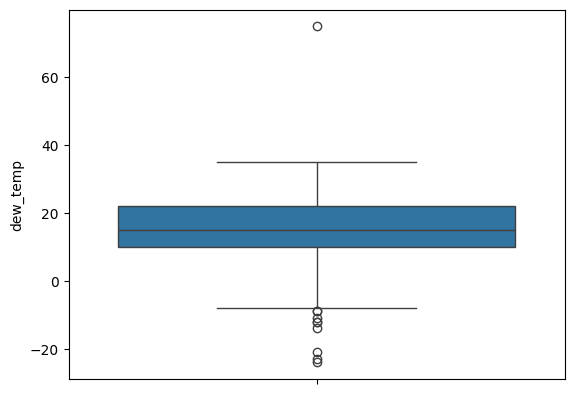

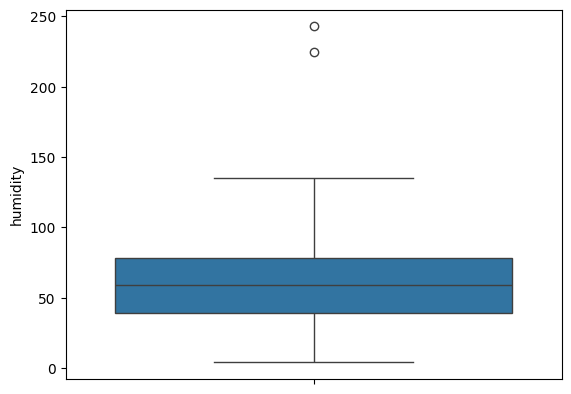

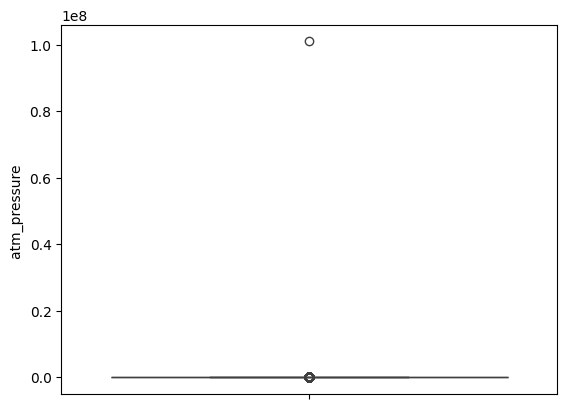

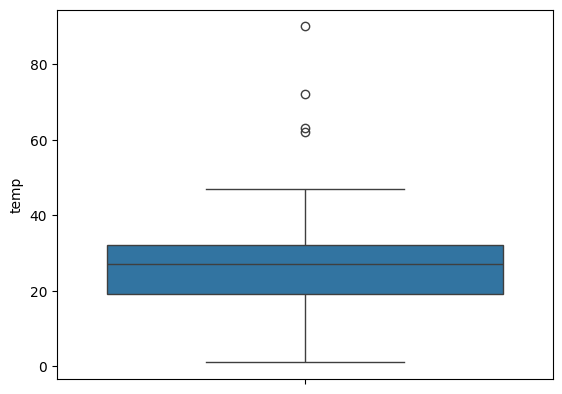

In [20]:
li=["dew_temp","humidity","atm_pressure ","temp",]

for i in li:
    sns.boxplot(df[i])
    plt.show()

In [21]:
%%capture
df['conditions'].fillna(df['conditions'].mode()[0], inplace=True)  # Fill with median
df['wind_direction'].fillna(df['wind_direction'].mode()[0], inplace=True)  # Fill with mode

In [22]:
df.isnull().sum()

conditions          0
dew_temp          621
fog                 0
balls_of_ice        0
humidity          757
atm_pressure      232
rain                0
snow                0
temp              673
 tornado            0
wind_direction      0
dtype: int64

In [23]:
%%capture
df['dew_temp'].fillna(df['dew_temp'].median(), inplace=True)  # Fill with median
df['humidity'].fillna(df['humidity'].median(), inplace=True)  # Fill with mode
df['atm_pressure '].fillna(df['atm_pressure '].median(), inplace=True)  # Fill with median
df['wind_direction'].fillna(df['wind_direction'].median(), inplace=True)  # Fill with mode
df["temp"].fillna(df["temp"].median(),inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   conditions      100990 non-null  int64  
 1   dew_temp        100990 non-null  float64
 2   fog             100990 non-null  int64  
 3   balls_of_ice    100990 non-null  int64  
 4   humidity        100990 non-null  float64
 5   atm_pressure    100990 non-null  float64
 6   rain            100990 non-null  int64  
 7   snow            100990 non-null  int64  
 8   temp            100990 non-null  float64
 9    tornado        100990 non-null  int64  
 10  wind_direction  100990 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 8.5 MB


In [25]:
#%%capture
#for i in df.columns:
    #if df[i].dtype in ["float64","int64"]:
     #   df[i].fillna(df[i].median(),inplace=True)
    #se:
       # df[i].fillna(df[i].mode()[0],inplace=True)

In [26]:
df

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,rain,snow,temp,tornado,wind_direction
0,31,9.0,0,0,27.0,1010.0,0,0,30.0,0,16
1,31,10.0,0,0,32.0,-9999.0,0,0,28.0,0,7
2,31,11.0,0,0,44.0,-9999.0,0,0,24.0,0,7
3,31,10.0,0,0,41.0,1010.0,0,0,24.0,0,7
4,31,11.0,0,0,47.0,1011.0,0,0,23.0,0,7
...,...,...,...,...,...,...,...,...,...,...,...
100985,5,17.0,0,0,25.0,1005.0,0,0,34.0,0,6
100986,5,14.0,0,0,16.0,1003.0,0,0,38.0,0,6
100987,5,12.0,0,0,14.0,1002.0,0,0,36.0,0,16
100988,5,15.0,0,0,27.0,1004.0,0,0,32.0,0,6


In [27]:
df.isnull().sum()

conditions        0
dew_temp          0
fog               0
balls_of_ice      0
humidity          0
atm_pressure      0
rain              0
snow              0
temp              0
 tornado          0
wind_direction    0
dtype: int64

In [28]:

def out(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    return ll , ul 


In [29]:
for i in li:
    ll , ul = out(df[i])
    df[i]=np.where(df[i]<ll,ll,df[i])
    df[i]=np.where (df[i]>ul,ul,df[i])


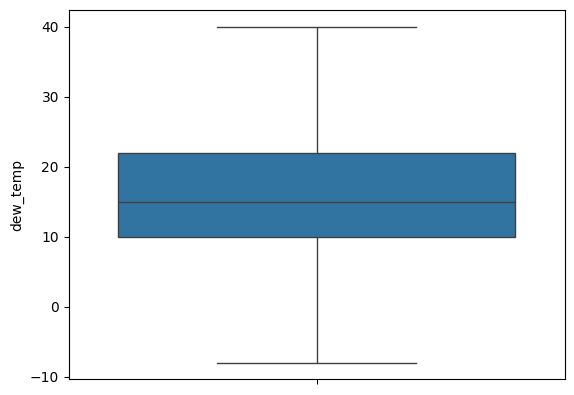

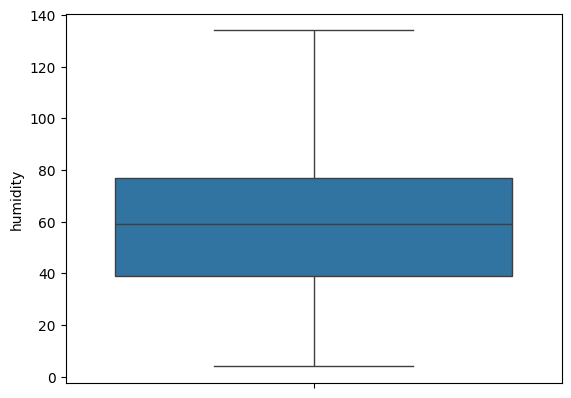

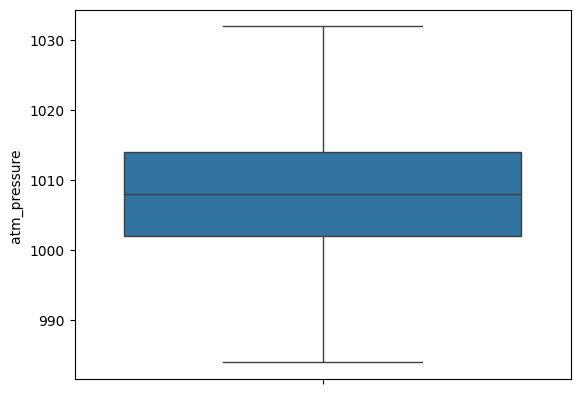

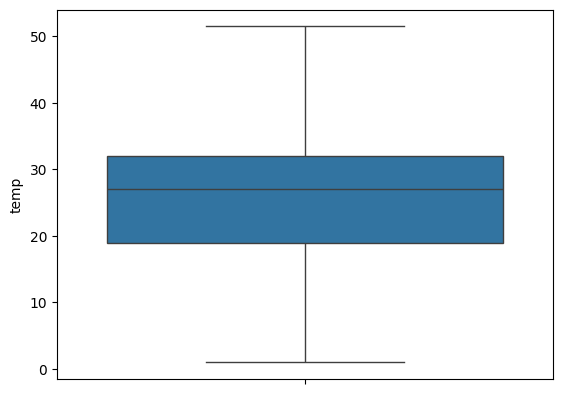

In [30]:
for i in li:
    sns.boxplot(df[i])
    plt.show()    

In [31]:
df.columns

Index(['conditions', 'dew_temp', 'fog', 'balls_of_ice ', 'humidity',
       'atm_pressure ', 'rain', 'snow', 'temp', ' tornado', 'wind_direction'],
      dtype='object')

In [32]:
df["dew_temp"].describe()

count    100990.000000
mean         15.736924
std           7.032415
min          -8.000000
25%          10.000000
50%          15.000000
75%          22.000000
max          40.000000
Name: dew_temp, dtype: float64

In [33]:
# model preparation sytarts now
import sklearn

In [34]:
x=df.drop(columns="rain")
y=df["rain"]

In [35]:
x

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,snow,temp,tornado,wind_direction
0,31,9.0,0,0,27.0,1010.0,0,30.0,0,16
1,31,10.0,0,0,32.0,984.0,0,28.0,0,7
2,31,11.0,0,0,44.0,984.0,0,24.0,0,7
3,31,10.0,0,0,41.0,1010.0,0,24.0,0,7
4,31,11.0,0,0,47.0,1011.0,0,23.0,0,7
...,...,...,...,...,...,...,...,...,...,...
100985,5,17.0,0,0,25.0,1005.0,0,34.0,0,6
100986,5,14.0,0,0,16.0,1003.0,0,38.0,0,6
100987,5,12.0,0,0,14.0,1002.0,0,36.0,0,16
100988,5,15.0,0,0,27.0,1004.0,0,32.0,0,6


In [36]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train ,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [37]:
x_train

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,snow,temp,tornado,wind_direction
80493,5,24.0,0,0,29.0,998.0,0,40.0,0,16
65576,38,7.0,0,0,20.0,1009.0,0,25.0,0,16
66965,5,24.0,0,0,41.0,996.0,0,36.0,0,1
46496,5,25.0,0,0,89.0,1004.0,0,27.0,0,9
70673,25,10.0,1,0,89.0,1017.0,0,11.0,0,17
...,...,...,...,...,...,...,...,...,...,...
6265,5,26.0,0,0,79.0,1005.0,0,30.0,0,7
54886,24,14.0,0,0,88.0,1018.0,0,16.0,0,14
76820,23,9.0,1,0,97.0,1019.0,0,9.0,0,17
860,31,1.0,0,0,66.0,1017.0,0,7.0,0,7


In [38]:
df.isnull().sum()

conditions        0
dew_temp          0
fog               0
balls_of_ice      0
humidity          0
atm_pressure      0
rain              0
snow              0
temp              0
 tornado          0
wind_direction    0
dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred=lr.predict(x_test)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
f1 = f1_score(y_test, y_pred)
print(f1)
cm= confusion_matrix(y_test, y_pred)
print(cm)
ps = precision_score(y_test, y_pred)
print(ps)
rs = recall_score(y_test, y_pred)
print(rs)

0.3193916349809886
[[24585    50]
 [  487   126]]
0.7159090909090909
0.20554649265905384


In [43]:
x_train

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,snow,temp,tornado,wind_direction
80493,5,24.0,0,0,29.0,998.0,0,40.0,0,16
65576,38,7.0,0,0,20.0,1009.0,0,25.0,0,16
66965,5,24.0,0,0,41.0,996.0,0,36.0,0,1
46496,5,25.0,0,0,89.0,1004.0,0,27.0,0,9
70673,25,10.0,1,0,89.0,1017.0,0,11.0,0,17
...,...,...,...,...,...,...,...,...,...,...
6265,5,26.0,0,0,79.0,1005.0,0,30.0,0,7
54886,24,14.0,0,0,88.0,1018.0,0,16.0,0,14
76820,23,9.0,1,0,97.0,1019.0,0,9.0,0,17
860,31,1.0,0,0,66.0,1017.0,0,7.0,0,7


In [44]:
y_train

80493    0
65576    0
66965    0
46496    0
70673    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: rain, Length: 75742, dtype: int64

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [46]:
y_pred1=knn.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
f1 = f1_score(y_test, y_pred1)
print(f1)
cm= confusion_matrix(y_test, y_pred1)
print(cm)
ps = precision_score(y_test, y_pred1)
print(ps)
rs = recall_score(y_test, y_pred1)
print(rs)

0.7878228782287823
[[24591    44]
 [  186   427]]
0.9065817409766455
0.6965742251223491


In [48]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_preddt=dt.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
f1 = f1_score(y_test, y_preddt)
print(f1)
cm= confusion_matrix(y_test, y_preddt)
print(cm)
ps = precision_score(y_test, y_preddt)
print(ps)
rs = recall_score(y_test, y_preddt)
print(rs)

0.9756493506493507
[[24617    18]
 [   12   601]]
0.9709208400646203
0.9804241435562806


In [51]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_predrf=rf.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
f1 = f1_score(y_test, y_predrf)
print(f1)
cm= confusion_matrix(y_test, y_predrf)
print(cm)
ps = precision_score(y_test, y_predrf)
print(ps)
rs = recall_score(y_test, y_predrf)
print(rs)

0.9646672144617913
[[24618    17]
 [   26   587]]
0.9718543046357616
0.9575856443719413


In [54]:
# XGBOOST
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_predxg= xgb.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are defined
f1 = f1_score(y_test, y_predxg)
print(f1)
cm= confusion_matrix(y_test, y_predxg)
print(cm)
ps = precision_score(y_test, y_predxg)
print(ps)
rs = recall_score(y_test, y_predxg)
print(rs)

0.9812855980471928
[[24622    13]
 [   10   603]]
0.9788961038961039
0.9836867862969005


In [57]:
# i am considering precision score and f1 score in that i have XGBoost have good performance
# i am going with stream lit as well gradio

In [58]:
import joblib

In [70]:
joblib.dump(xgb,"rainxgb.pkl")

['rainxgb.pkl']

In [60]:
x

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,snow,temp,tornado,wind_direction
0,31,9.0,0,0,27.0,1010.0,0,30.0,0,16
1,31,10.0,0,0,32.0,984.0,0,28.0,0,7
2,31,11.0,0,0,44.0,984.0,0,24.0,0,7
3,31,10.0,0,0,41.0,1010.0,0,24.0,0,7
4,31,11.0,0,0,47.0,1011.0,0,23.0,0,7
...,...,...,...,...,...,...,...,...,...,...
100985,5,17.0,0,0,25.0,1005.0,0,34.0,0,6
100986,5,14.0,0,0,16.0,1003.0,0,38.0,0,6
100987,5,12.0,0,0,14.0,1002.0,0,36.0,0,16
100988,5,15.0,0,0,27.0,1004.0,0,32.0,0,6


In [61]:
y

0         0
1         0
2         0
3         0
4         0
         ..
100985    0
100986    0
100987    0
100988    0
100989    0
Name: rain, Length: 100990, dtype: int64

In [62]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [63]:
import xgboost
print(xgboost.__version__)


2.1.2


In [65]:
df.head()

,conditions,dew_temp,fog,balls_of_ice,humidity,atm_pressure,rain,snow,temp,tornado,wind_direction
0,31,9.0,0,0,27.0,1010.0,0,0,30.0,0,16
1,31,10.0,0,0,32.0,984.0,0,0,28.0,0,7
2,31,11.0,0,0,44.0,984.0,0,0,24.0,0,7
3,31,10.0,0,0,41.0,1010.0,0,0,24.0,0,7
4,31,11.0,0,0,47.0,1011.0,0,0,23.0,0,7


In [66]:
df1.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [69]:
df1[" _wdire"].value_counts()

 _wdire
North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: count, dtype: int64